In [70]:
import pandas as pd 
import matplotlib.pyplot as plt 

Context : 

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Content : 

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [3]:
data = pd.read_csv("diabetes.csv") 
data 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### check duplicated 

In [12]:
data.duplicated().sum()

0

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.shape

(768, 9)

In [15]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
min_max = data.aggregate(["min" , "max" , "mean"  ]).T 
min_max

,min,max,mean
Pregnancies,0.000,17.00,3.845052
Glucose,0.000,199.00,120.894531
BloodPressure,0.000,122.00,69.105469
SkinThickness,0.000,99.00,20.536458
Insulin,0.000,846.00,79.799479
BMI,0.000,67.10,31.992578
DiabetesPedigreeFunction,0.078,2.42,0.471876
Age,21.000,81.00,33.240885
Outcome,0.000,1.00,0.348958


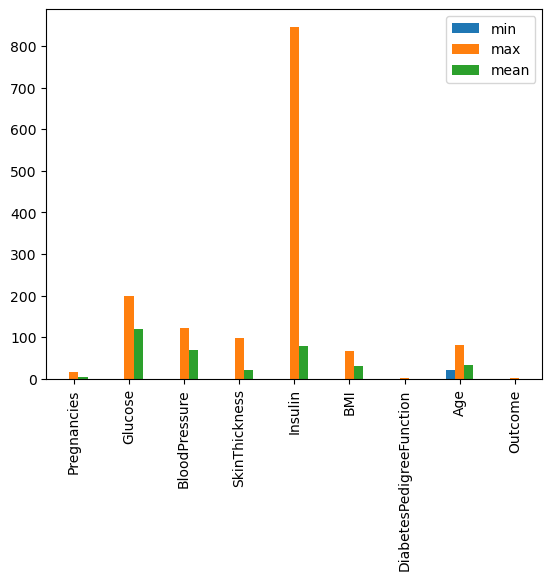

In [ ]:
min_max = data.aggregate(["min" , "max" , "mean"  ]).T.plot(kind= "bar")


Glucose :


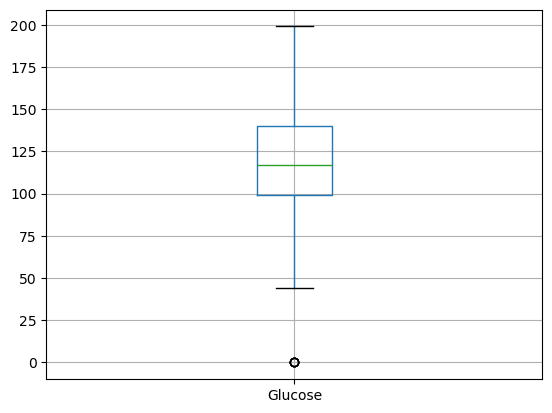

-----------------------------
BloodPressure :


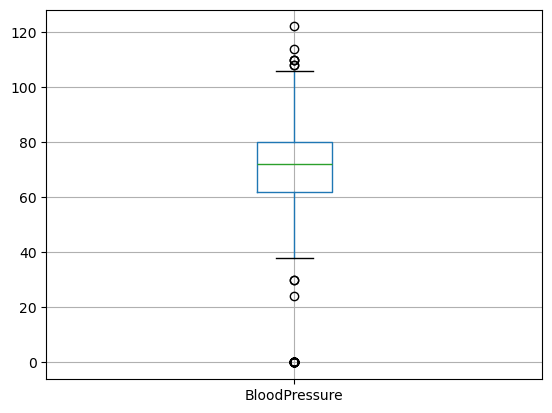

-----------------------------
SkinThickness :


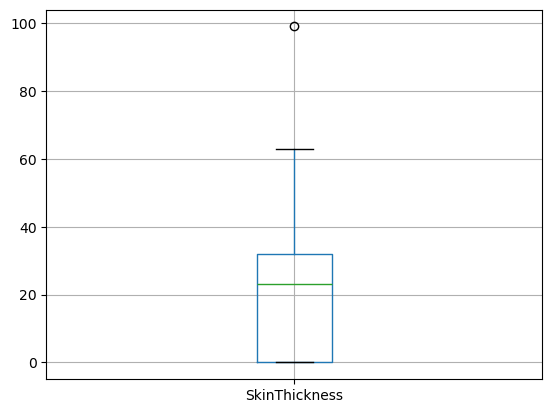

-----------------------------
Insulin :


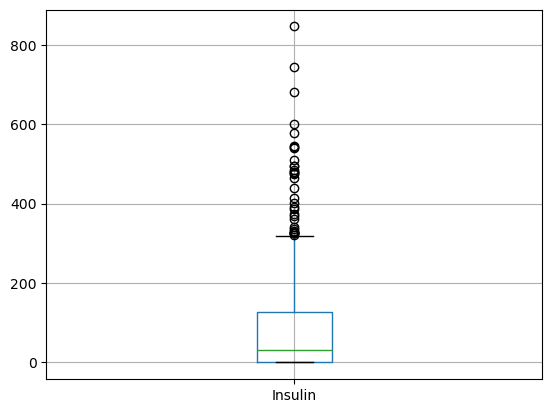

-----------------------------
BMI :


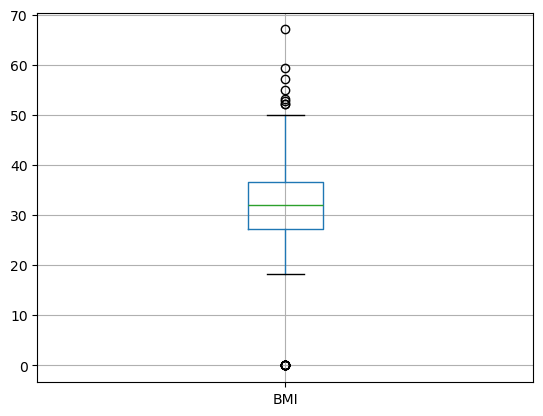

-----------------------------
DiabetesPedigreeFunction :


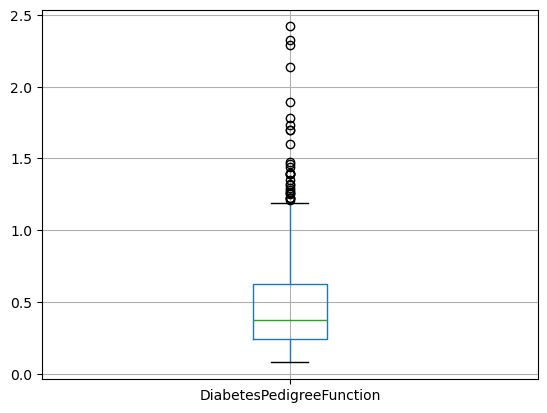

-----------------------------
Age :


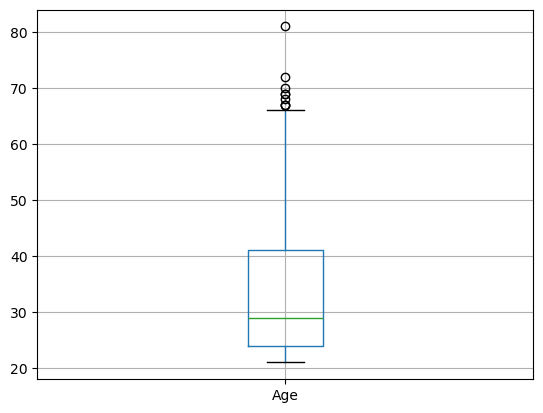

-----------------------------
Outcome :


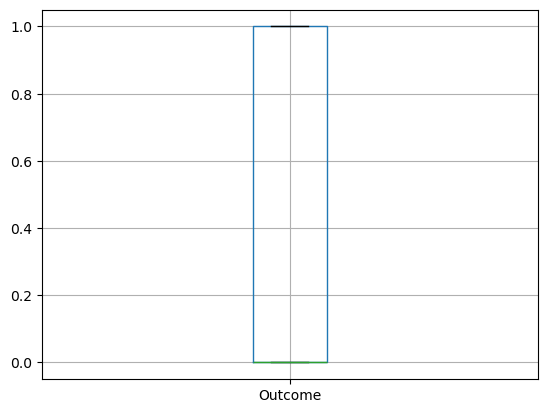

-----------------------------


In [90]:
for i in data.columns[1:] : 
    print(i ,':')
    data.boxplot( i)
    plt.show()
    print('-----------------------------')

In [29]:
AgePregnancies = data.groupby(["Age" , "Pregnancies"]).DiabetesPedigreeFunction.value_counts().to_frame()
AgePregnancies

count
Age Pregnancies DiabetesPedigreeFunction       
21  0           0.078                         1
                0.143                         1
                0.206                         1
                0.207                         1
                0.252                         1
...                                         ...
69  5           0.186                         1
                0.640                         1
70  4           0.235                         1
72  2           0.832                         1
81  9           0.460                         1

[765 rows x 1 columns]

In [32]:
import matplotlib.pyplot as plt 
import seaborn as sns 

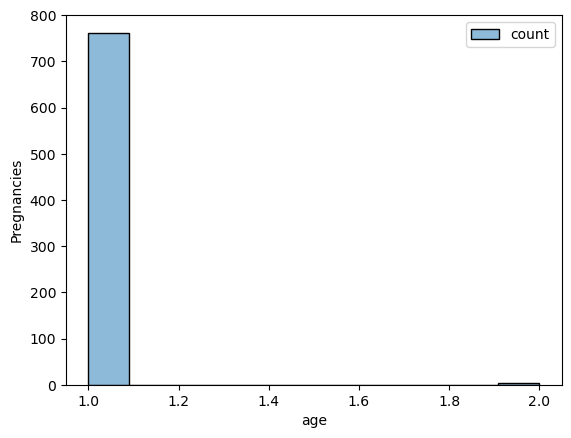

In [46]:
plt.Figure(figsize=(8,10))
sns.histplot(AgePregnancies)
plt.xlabel("age") 
plt.ylabel("Pregnancies")
plt.show()

In [93]:
from sklearn.model_selection import train_test_split 

In [148]:
x  = data.drop("Outcome" , axis= 1 )
y = data.Outcome 

In [149]:
x 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [150]:
y 

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [151]:
from sklearn.svm import SVC 

In [152]:
from sklearn.preprocessing import MinMaxScaler

In [153]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y  , train_size=.2 )

In [154]:
xtrain

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
105,1,126,56,29,152,28.7,0.801,21
259,11,155,76,28,150,33.3,1.353,51
708,9,164,78,0,0,32.8,0.148,45
504,3,96,78,39,0,37.3,0.238,40
565,2,95,54,14,88,26.1,0.748,22
...,...,...,...,...,...,...,...,...
171,6,134,70,23,130,35.4,0.542,29
173,1,79,60,42,48,43.5,0.678,23
255,1,113,64,35,0,33.6,0.543,21
444,4,117,62,12,0,29.7,0.380,30


In [155]:
xtest

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
657,1,120,80,48,200,38.9,1.162,41
592,3,132,80,0,0,34.4,0.402,44
358,12,88,74,40,54,35.3,0.378,48
419,3,129,64,29,115,26.4,0.219,28
225,1,87,78,27,32,34.6,0.101,22
...,...,...,...,...,...,...,...,...
357,13,129,0,30,0,39.9,0.569,44
415,3,173,84,33,474,35.7,0.258,22
296,2,146,70,38,360,28.0,0.337,29
648,11,136,84,35,130,28.3,0.260,42


In [156]:
ytrain

105    0
259    1
708    1
504    0
565    0
      ..
171    1
173    0
255    1
444    1
344    0
Name: Outcome, Length: 153, dtype: int64

In [157]:
ytest

657    0
592    1
358    0
419    1
225    0
      ..
357    1
415    1
296    1
648    1
172    0
Name: Outcome, Length: 615, dtype: int64

In [158]:
model =  SVC()

In [159]:
from sklearn.preprocessing import LabelEncoder 
le  = LabelEncoder() 
y_train = le.fit_transform(ytrain)
y_test = le.fit_transform(ytest)

In [160]:
model.fit(xtrain, y_train)

SVC()

In [161]:
model.score(xtrain ,y_train)

0.7581699346405228

In [162]:
actual_value = ytest.values 

In [163]:
predictions= model.predict(xtest)

In [164]:
from sklearn .metrics import classification_report

In [165]:
print(classification_report(actual_value , predictions))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83       400
           1       0.77      0.40      0.52       215

    accuracy                           0.75       615
   macro avg       0.76      0.67      0.68       615
weighted avg       0.75      0.75      0.72       615

